<a href="https://colab.research.google.com/github/RAJU009F/GEN-AI-ML/blob/master/Copy_of_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [7]:
dataset_training = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_training.iloc[:, 1:2].values

In [8]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Feature Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [13]:

X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [17]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [18]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [19]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [20]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [21]:
regressor.add(LSTM(units=50,))
regressor.add(Dropout(0.2))

### Adding the output layer

In [22]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [23]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [24]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - loss: 0.1173
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0072
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - loss: 0.0050
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - loss: 0.0059
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - loss: 0.0051
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 0.0049
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - loss: 0.0054
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - loss: 0.0052
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - loss: 0.0042
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.0047
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0045
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 0.0040
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - loss: 0.0039
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 0.0040
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6

## Part 3 - Making the predictions and visualising the results

In [25]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_prices = dataset_test.iloc[:, 1:2].values

### Getting the real stock price of 2017

In [27]:
dataset_total = pd.concat((dataset_training['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Getting the predicted stock price of 2017

In [28]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


### Visualising the results

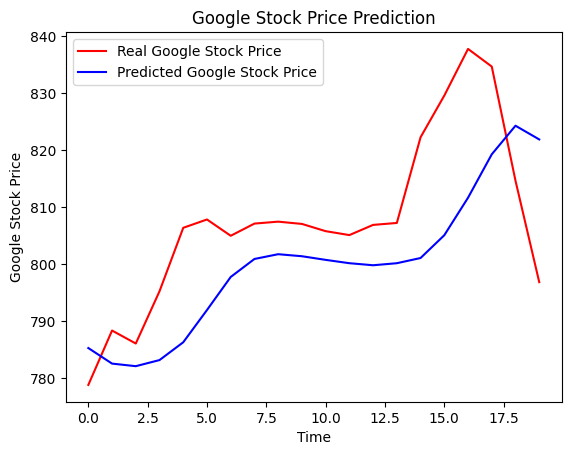

In [29]:
plt.plot(real_stock_prices, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()